# FlightPrediction EDA and Feature Engineering

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [182]:
df_train = pd.read_excel('datasets/Flight_Prediction/Data_Train.xlsx')
df_test =pd.read_excel('datasets/Flight_Prediction/Test_set.xlsx')

In [183]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [184]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [185]:
##Feature Engineering Process
df_train['Date']= df_train['Date_of_Journey'].str.split('/').str[0].astype(int)
df_train['Month']= df_train['Date_of_Journey'].str.split('/').str[1].astype(int)
df_train['Year']= df_train['Date_of_Journey'].str.split('/').str[2].astype(int)

##Another type
#df_train['Date'] = df_train['Date_of_Journey'].apply(lambda x:x.split('/')[0])

In [186]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [187]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [188]:
df_train.drop('Date_of_Journey',axis=1, inplace=True)

In [189]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [190]:
 df_train['Arrival_Time'] = df_train['Arrival_Time'].str.split(' ').str[0]

In [191]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [192]:
df_train['Arrival_Hours'] = df_train['Arrival_Time'].str.split(':').str[0].astype(int)

In [193]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21


In [194]:
df_train['Arrival_Mins'] = df_train['Arrival_Time'].str.split(':').str[1].astype(int)

In [195]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [196]:
df_train.drop('Arrival_Time',axis=1,inplace= True)

In [197]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [198]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Arrival_Hours    10683 non-null  int32 
 13  Arrival_Mins     10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 959.9+ KB


In [199]:
df_train['Dep_Hours'] = df_train['Dep_Time'].str.split(':').str[0].astype(int)
df_train['Dep_Mins'] = df_train['Dep_Time'].str.split(':').str[1].astype(int)
df_train.drop('Dep_Time',axis=1,inplace= True)

In [200]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Mins,Dep_Hours,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [201]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Mins,Dep_Hours,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [202]:
df_train['duration_hour']= df_train['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [203]:
df_train[df_train['duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Mins,Dep_Hours,Dep_Mins,duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,55,16,50,5m


In [204]:
df_train.drop(6474,axis=0,inplace=True)

In [205]:
df_train['duration_hour'] = df_train['duration_hour'].astype('int') * 60

In [206]:
df_train['duration_mins']= df_train['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [207]:
df_train['duration_mins'].fillna(0, inplace=True)

In [208]:
df_train['duration_mins'] = df_train['duration_mins'].astype('int')

In [209]:
df_train['Duration_in_mins'] = df_train['duration_hour'] + df_train['duration_mins']

In [210]:
df_train = df_train.drop(['duration_mins','duration_hour'], axis = 1)

In [211]:
df_train['Duration_in_mins'].astype(int)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_in_mins, Length: 10682, dtype: int32

In [212]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,285


In [213]:
df_train.drop('Route',axis=1,inplace=True)

In [214]:
df_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_in_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,285


In [215]:
df_train.drop('Duration', axis=1,inplace=True)

In [216]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_in_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,21,35,16,50,285


In [217]:
df_train[df_train['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_in_mins
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,5,2019,9,25,9,45,1420


In [218]:
df_train.drop(9039,axis=0,inplace=True)

In [219]:
df_train = pd.get_dummies(df_train,columns=['Airline','Source','Destination','Total_Stops','Additional_Info'],drop_first=True,dtype=int)

In [220]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Price                                         10681 non-null  int64
 1   Date                                          10681 non-null  int32
 2   Month                                         10681 non-null  int32
 3   Year                                          10681 non-null  int32
 4   Arrival_Hours                                 10681 non-null  int32
 5   Arrival_Mins                                  10681 non-null  int32
 6   Dep_Hours                                     10681 non-null  int32
 7   Dep_Mins                                      10681 non-null  int32
 8   Duration_in_mins                              10681 non-null  int32
 9   Airline_Air India                             10681 non-null  int32
 10  Airline_GoAir  

#### Seperating the target and input columns 

In [221]:
targets = pd.DataFrame()
targets['Price'] = df_train['Price']

In [222]:
# dropping the Price column from the final dataset to capture the values
df_train.drop('Price', axis=1, inplace=True)

In [223]:
df_train.shape

(10681, 41)

In [224]:
targets.shape

(10681, 1)

In [225]:
df_train.head()

,Date,Month,Year,Arrival_Hours,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_in_mins,Airline_Air India,Airline_GoAir,...,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,24,3,2019,1,10,22,20,170,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,5,2019,13,15,5,50,445,1,0,...,0,0,0,0,0,0,0,0,1,0
2,9,6,2019,4,25,9,25,1140,0,0,...,0,0,0,0,0,0,0,0,1,0
3,12,5,2019,23,30,18,5,325,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,3,2019,21,35,16,50,285,0,0,...,0,0,0,0,0,0,0,0,1,0


In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train,targets, test_size=0.33, random_state=42)

In [227]:
X_train.head()

,Date,Month,Year,Arrival_Hours,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_in_mins,Airline_Air India,Airline_GoAir,...,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
9870,12,6,2019,12,0,16,30,1170,0,0,...,0,0,0,0,0,0,0,0,1,0
8423,9,5,2019,19,0,8,0,660,0,0,...,0,0,0,0,0,1,0,0,0,0
4975,21,6,2019,12,55,10,20,155,0,0,...,1,0,0,0,0,0,0,0,1,0
4775,9,6,2019,16,20,6,30,590,0,0,...,0,0,0,0,0,1,0,0,0,0
6829,21,3,2019,18,50,10,45,1925,0,0,...,0,0,0,0,0,0,0,0,1,0


In [228]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7156 entries, 9870 to 7271
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Date                                          7156 non-null   int32
 1   Month                                         7156 non-null   int32
 2   Year                                          7156 non-null   int32
 3   Arrival_Hours                                 7156 non-null   int32
 4   Arrival_Mins                                  7156 non-null   int32
 5   Dep_Hours                                     7156 non-null   int32
 6   Dep_Mins                                      7156 non-null   int32
 7   Duration_in_mins                              7156 non-null   int32
 8   Airline_Air India                             7156 non-null   int32
 9   Airline_GoAir                                 7156 non-null   int32
 10  Airline_IndiGo

# Feature Selection 

<Axes: >

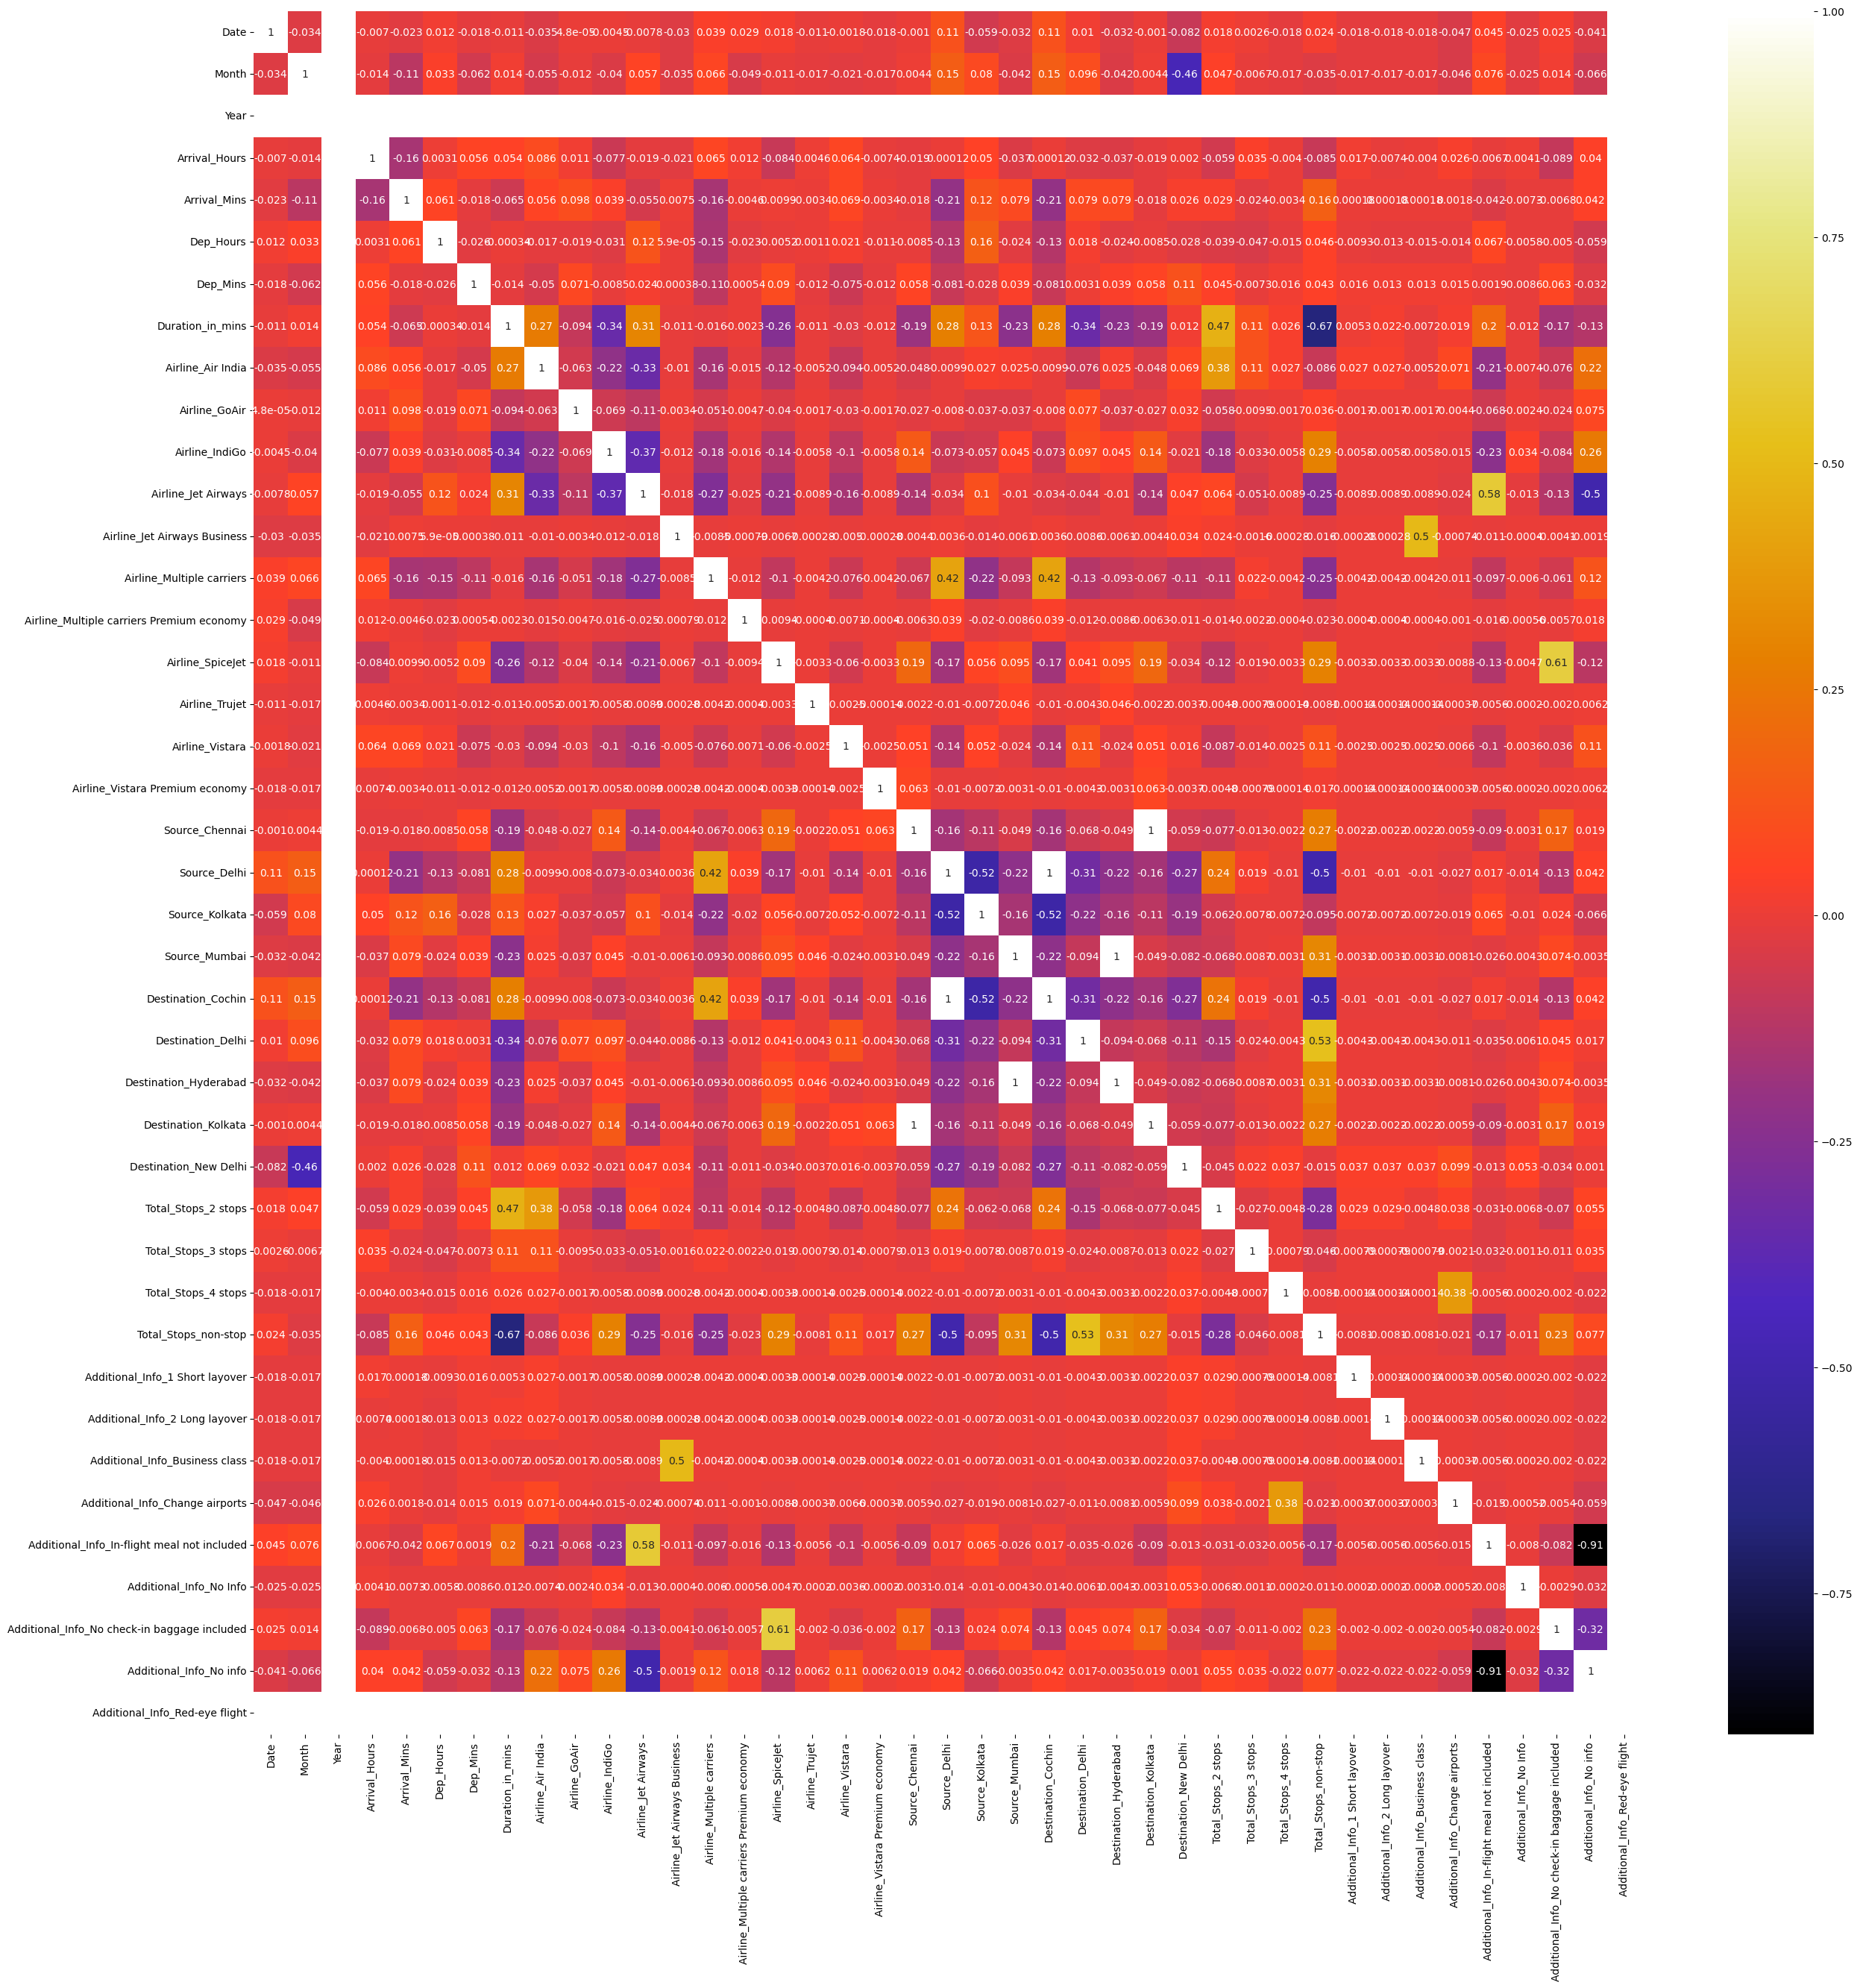

In [230]:
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr(),annot=True,cmap=plt.cm.CMRmap)

In [239]:
from sklearn.feature_selection import mutual_info_regression

In [246]:
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

C:\Users\91908\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.19458156, 0.57795999, 0.        , 0.36405682, 0.31913695,
       0.30317112, 0.23642662, 0.47502038, 0.26422806, 0.03804303,
       0.35163959, 0.52336886, 0.00623072, 0.25087355, 0.00899518,
       0.19099467, 0.        , 0.12808525, 0.        , 0.12761175,
       0.50182983, 0.42817127, 0.19837034, 0.4965866 , 0.33022629,
       0.19000322, 0.12345482, 0.15727941, 0.2744444 , 0.00395468,
       0.00262671, 0.54050021, 0.00238939, 0.00307174, 0.        ,
       0.        , 0.38705042, 0.        , 0.11435114, 0.39390574,
       0.00335722])

In [243]:
 from sklearn.feature_selection import SelectPercentile

In [253]:
selected_columns = SelectPercentile(mutual_info_regression,percentile = 61)
selected_columns.fit(X_train,y_train)

C:\Users\91908\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectPercentile(percentile=61,
                 score_func=<function mutual_info_regression at 0x0000017BA52FCFE0>)

In [254]:
X_train.columns[selected_columns.get_support()]

Index(['Date', 'Month', 'Arrival_Hours', 'Arrival_Mins', 'Dep_Hours',
       'Dep_Mins', 'Duration_in_mins', 'Airline_Air India', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Total_Stops_2 stops',
       'Total_Stops_non-stop', 'Additional_Info_In-flight meal not included',
       'Additional_Info_No info'],
      dtype='object')

In [258]:
X_train[['Date', 'Month', 'Arrival_Hours', 'Arrival_Mins', 'Dep_Hours',
       'Dep_Mins', 'Duration_in_mins', 'Airline_Air India', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Total_Stops_2 stops',
       'Total_Stops_non-stop', 'Additional_Info_In-flight meal not included',
       'Additional_Info_No info']]

,Date,Month,Arrival_Hours,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_in_mins,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_non-stop,Additional_Info_In-flight meal not included,Additional_Info_No info
9870,12,6,12,0,16,30,1170,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8423,9,5,19,0,8,0,660,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4975,21,6,12,55,10,20,155,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4775,9,6,16,20,6,30,590,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6829,21,3,18,50,10,45,1925,0,0,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,27,3,4,25,9,0,1165,0,0,1,...,0,1,0,0,0,0,0,0,0,1
5191,9,5,20,45,14,5,400,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5390,15,5,1,30,12,50,760,0,0,0,...,0,1,0,0,0,0,0,0,0,1
860,3,3,3,25,0,40,165,0,1,0,...,0,0,0,0,0,1,0,1,0,1


### lets use Random Forest alogorithms to fit the data

In [259]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()

In [260]:
RFR.fit(X_train,y_train)

C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [261]:
y_pred = RFR.predict(X_test)

In [262]:
from sklearn import metrics

In [264]:
RFR.score(X_train,y_train)

0.9771663276147033

In [265]:
RFR.score(X_test,y_test)

0.9097586316336549

In [268]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 635.8111068319466
MSE: 1873396.715371173
RMSE: 1368.7208317882698


In [271]:
metrics.r2_score(y_test,y_pred)

0.9097586316336549

## Lets go ahead with the hyperparameter tuning to if the model can be tweaked a bit more

In [272]:
# Using RandomizedSearchCV -> Fast

from sklearn.model_selection import RandomizedSearchCV

In [288]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [289]:
param_grid ={"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf}

In [295]:
RS = RandomizedSearchCV(estimator=RFR,param_distributions=param_grid,scoring='neg_mean_squared_error',verbose=2,cv=5 )

In [296]:
regressor = RS.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   2.1s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   2.1s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   2.1s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   2.1s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time=   1.9s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   6.8s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   6.8s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   6.9s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   6.5s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   6.9s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   3.3s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   3.3s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   3.3s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   3.2s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   3.2s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   5.4s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   5.4s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   5.4s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   5.4s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   5.4s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   8.6s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   8.6s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   8.5s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   8.5s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   8.8s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.2s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.2s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.2s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.3s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.2s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   6.7s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   6.6s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   6.9s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   6.8s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   7.0s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=  22.3s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=  21.6s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=  22.5s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=  21.5s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=  21.5s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=  12.5s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=  12.6s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=  12.6s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=  12.7s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=  12.5s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=  12.4s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=  13.1s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=  12.5s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=  12.5s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=  12.4s


C:\Users\91908\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [307]:
regressor.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 15}

In [303]:
prediction = regressor.predict(X_test)

In [304]:
prediction

array([6486.02475253, 8772.36220317, 8480.01250214, ..., 5573.44533336,
       4832.53121317, 6862.31060332])

In [305]:
metrics.r2_score(prediction,y_test)

0.8654226241967944

In [306]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 920.1862358659304
MSE: 2213770.389749757
RMSE: 1487.8744536249546


In summary, the decrease in performance after hyperparameter tuning doesn't directly indicate overfitting. It suggests that the tuning process might not have found a set of parameters that improves upon the default or that the model complexity and the data don't align as expected. It's essential to look at the whole picture before drawing conclusions about overfitting.